In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv("adult.data")
df_cols = ['age','workclass','fnlwgt','education','eduation-num','marital-status','occupation','relationship','race','gender','capital-gain','captital-loss','hour-per-week','native-country','income']
df.columns = df_cols
df.head()

,age,workclass,fnlwgt,education,eduation-num,marital-status,occupation,relationship,race,gender,capital-gain,captital-loss,hour-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   eduation-num    32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  captital-loss   32560 non-null  int64 
 12  hour-per-week   32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe()

,age,fnlwgt,eduation-num,capital-gain,captital-loss,hour-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.shape

(32560, 15)

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
eduation-num      0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
captital-loss     0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [13]:
df['income'].value_counts(normalize=True)

income
<=50K    0.759183
>50K     0.240817
Name: proportion, dtype: float64

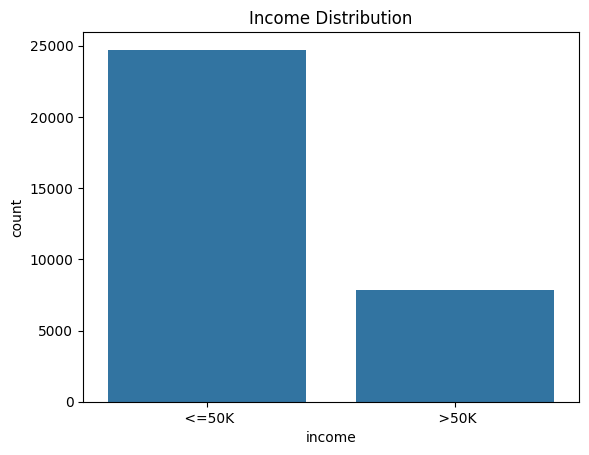

In [14]:
sns.countplot(x='income',data=df)
plt.title("Income Distribution")
plt.show()

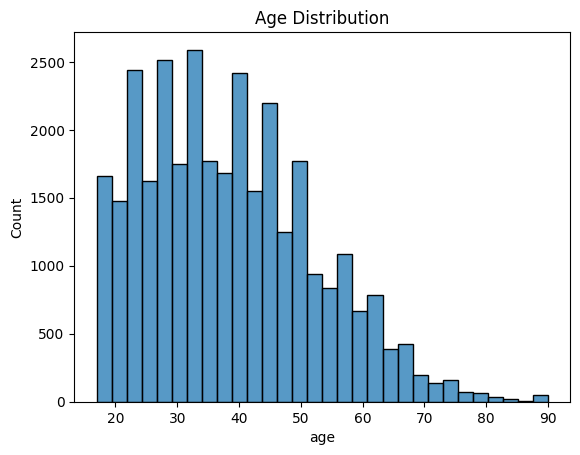

In [15]:
sns.histplot(df['age'],bins=30)
plt.title('Age Distribution')
plt.show()

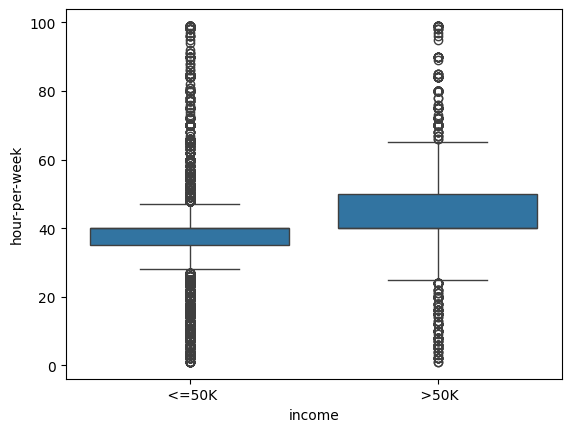

In [18]:
sns.boxplot(x='income', y='hour-per-week', data=df)
plt.show()


In [33]:
df_clean = df.dropna()
df_clean.shape


(32560, 15)

In [41]:
X =df_clean.drop('income',axis=1)
y = df_clean['income'].copy()

In [42]:
y = y.astype(str).str.strip().str.replace('.', '', regex=False)


In [43]:
y.value_counts()

income
<=50K    24719
>50K      7841
Name: count, dtype: int64

In [44]:
y = y.map({'<=50K': 0, '>50K': 1})


In [45]:
y.isna().sum()

np.int64(0)

In [46]:
y.value_counts()


income
0    24719
1     7841
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


ValueError: Input y contains NaN.